In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [20]:
data_BA = 'datas/BeerAdvocate/'
data_MBD = 'datas/Matched_Beer_Data/'
data_RB = 'datas/Rate_Beer/'

**BEER ADVOCATE FIRST DATASET**

In [21]:
beers_BA = pd.read_csv(data_BA + 'beers.csv')
beers_BA

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280818,19139,Kölsch Ale,885,Summit Station Restaurant & Brewery,Kölsch,3,3,2.71,NaN,NaN,5.0,2.713333,NaN,0,NaN
280819,19140,Nut Brown Ale,885,Summit Station Restaurant & Brewery,English Brown Ale,2,1,3.10,NaN,NaN,5.3,3.250000,NaN,0,NaN
280820,19146,Octoberfest,885,Summit Station Restaurant & Brewery,Märzen / Oktoberfest,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
280821,2805,Scotch Ale,885,Summit Station Restaurant & Brewery,Scotch Ale / Wee Heavy,0,0,NaN,NaN,NaN,7.0,NaN,NaN,0,NaN


In [22]:
breweries_BA = pd.read_csv(data_BA + 'breweries.csv')
breweries_BA

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2
...,...,...,...,...
16753,128,Germany,Privatbrauerei Franz Joseph Sailer,6
16754,5023,Aruba,Aruba Brewing,0
16755,1573,"United States, New York",John Harvard’s Brewery & Ale House,491
16756,16186,"United States, North Carolina",Triangle Brewing Company,20


In [93]:
users_BA_off = pd.read_csv(data_BA + 'users.csv')
users_BA_off

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland
...,...,...,...,...,...,...
153699,1,1,everman.532342,Everman,1.291115e+09,"United States, California"
153700,1,1,justin0001.352175,Justin0001,1.248343e+09,"United States, California"
153701,1,0,kyungsup.982216,Kyungsup,1.430561e+09,NaN
153702,1,1,joetex.800347,JoeTex,1.400234e+09,"United States, California"


**DEUXIEME DOSSIER DE DATA (Matched Beer Data)**

In [24]:
beers_MBD = pd.read_csv(data_MBD + 'beers.csv', header = 1)
beers_MBD

,abv,avg,avg_computed,avg_matched_valid_ratings,ba_score,beer_id,beer_name,beer_wout_brewery_name,brewery_id,brewery_name,...,brewery_id.1,brewery_name.1,nbr_matched_valid_ratings.1,nbr_ratings.1,overall_score,style.1,style_score,zscore.1,diff,sim
0,4.8,3.45,3.439867,3.504068,80.0,19827,Legbiter,Legbiter,10093,Strangford Lough Brewing Company Ltd,...,4959,Strangford Lough,89,89,23.0,Golden Ale/Blond Ale,27.0,-0.698304,1.000000,1.0
1,6.0,3.86,3.888750,3.768333,NaN,20841,St. Patrick's Ale,Patricks Ale St,10093,Strangford Lough Brewing Company Ltd,...,4959,Strangford Lough,11,11,52.0,Irish Ale,79.0,0.005754,0.527141,1.0
2,4.2,3.56,3.556094,3.580417,82.0,20842,St. Patrick's Best,Patricks Best St,10093,Strangford Lough Brewing Company Ltd,...,4959,Strangford Lough,74,74,26.0,Bitter,25.0,-0.862119,0.527141,1.0
3,4.8,3.96,3.960000,3.960000,NaN,22659,St. Patrick's Gold,Patricks Gold St,10093,Strangford Lough Brewing Company Ltd,...,4959,Strangford Lough,4,4,NaN,Amber Ale,NaN,-0.758491,0.527141,1.0
4,4.5,NaN,NaN,NaN,NaN,178681,Sheelin Stout,Stout,32848,The Sheelin Brewery,...,17616,Sheelin,2,2,NaN,Mild Ale,NaN,-0.347271,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45635,6.4,3.24,3.240000,3.236667,NaN,96911,Pale Ale,Pale Ale,32205,Do Can Brewery,...,18345,Do Can Brewery,1,1,NaN,India Pale Ale (IPA),NaN,0.161214,1.000000,1.0
45636,5.1,3.30,3.260000,3.248571,81.0,37457,Mustang Gold Ale,Ale Gold Mustang,10673,Warbird Brewing Company,...,5358,Warbird Brewing Company,57,57,21.0,Golden Ale/Blond Ale,18.0,-1.227920,0.806680,1.0
45637,6.0,3.54,3.545000,3.550000,83.0,47287,Shanty Irish,Irish Shanty,10673,Warbird Brewing Company,...,5358,Warbird Brewing Company,50,50,48.0,Irish Ale,57.0,-0.357975,1.000000,1.0
45638,6.0,3.56,3.664762,3.698000,83.0,37177,Thunderbolt Wheat,Wheat Thunderbolt,10673,Warbird Brewing Company,...,5358,Warbird Brewing Company,59,59,44.0,German Hefeweizen,50.0,-0.491306,1.000000,1.0


In [25]:
breweries_MBD = pd.read_csv(data_MBD + 'breweries.csv', header = 1)
breweries_MBD

,id,location,name,nbr_beers,id.1,location.1,name.1,nbr_beers.1,diff,sim
0,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,4959,Northern Ireland,Strangford Lough,5,0.431275,0.889062
1,32848,Northern Ireland,The Sheelin Brewery,4,17616,Northern Ireland,Sheelin,2,0.526388,0.863596
2,40360,Northern Ireland,Walled City Brewing Company,6,24866,Northern Ireland,Walled City,3,0.527852,0.954183
3,40309,Northern Ireland,Ards Brewing Company,7,13538,Northern Ireland,Ards Brewing Co.,13,0.554395,0.896098
4,41205,Northern Ireland,Barrahooley Brewery,3,22304,Northern Ireland,Barrahooley Craft Brewery,4,0.602544,0.896205
...,...,...,...,...,...,...,...,...,...,...
8276,10673,"United States, Indiana",Warbird Brewing Company,6,5358,"United States, Indiana",Warbird Brewing Company,6,0.658297,1.000000
8277,34365,France,Brasserie De La Goutte D'Or,0,16083,France,Goutte dOr,24,0.412731,0.848934
8278,23693,South Africa,Luyt Brewery,0,13836,South Africa,Luyt Brewery,1,0.706339,1.000000
8279,5025,Aruba,Cerbeseria Arubano,0,2409,Aruba,Cerbeseria Arubano,1,1.000000,1.000000


In [87]:
users_MBD_original = pd.read_csv(data_MBD + 'users.csv', header = 1)
users_MBD_original

,joined,location,nbr_ratings,nbr_reviews,user_id,user_name,user_name_lower,joined.1,location.1,nbr_ratings.1,user_id.1,user_name.1,user_name_lower.1
0,1.220868e+09,Germany,6,6,erzengel.248045,Erzengel,erzengel,1.224324e+09,Germany,8781,83106,Erzengel,erzengel
1,1.348394e+09,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1.385723e+09,"United States, Virginia",6240,290599,GenDV138,gendv138
2,1.207303e+09,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1.150798e+09,"United States, Washington",7452,38859,nimbleprop,nimbleprop
3,1.322737e+09,Estonia,11,0,visionthing.639993,visionthing,visionthing,1.242986e+09,Estonia,5462,91324,visionthing,visionthing
4,1.432116e+09,England,1,0,lazypyro.989356,LazyPyro,lazypyro,1.431166e+09,England,1096,368991,LazyPyro,lazypyro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,1.253182e+09,"United States, Pennsylvania",398,398,shadesofgray.371155,ShadesOfGray,shadesofgray,1.261998e+09,"United States, Pennsylvania",1,99346,ShadesOfGray,shadesofgray
3016,1.095847e+09,"United States, Michigan",587,587,ypsifly.8833,ypsifly,ypsifly,1.139569e+09,"United States, Michigan",1,33393,ypsifly,ypsifly
3017,1.047121e+09,"United States, Texas",1379,1379,hardtarget.1712,HardTarget,hardtarget,1.095934e+09,"United States, Texas",1,15553,HardTarget,hardtarget
3018,1.416740e+09,Vietnam,176,24,nelsonsaigon.897449,nelsonsaigon,nelsonsaigon,1.406369e+09,Vietnam,1,327965,nelsonsaigon,nelsonsaigon


In [10]:
users_approx_MBD = pd.read_csv(data_MBD + 'users_approx.csv', header = 1)
users_approx_MBD

,joined,location,nbr_ratings,nbr_reviews,user_id,user_name,user_name_lower,joined.1,location.1,nbr_ratings.1,user_id.1,user_name.1,user_name_lower.1,sim
0,1.483009e+09,Spain,3,0,magicuenca.1185749,MAGICuenca,magicuenca,1.484046e+09,Spain,89,442761,MAGICuenca91,magicuenca91,0.904534
1,1.220868e+09,Germany,6,6,erzengel.248045,Erzengel,erzengel,1.224324e+09,Germany,8781,83106,Erzengel,erzengel,1.000000
2,1.348394e+09,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1.385723e+09,"United States, Virginia",6240,290599,GenDV138,gendv138,1.000000
3,1.207303e+09,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1.150798e+09,"United States, Washington",7452,38859,nimbleprop,nimbleprop,1.000000
4,1.322737e+09,Estonia,11,0,visionthing.639993,visionthing,visionthing,1.242986e+09,Estonia,5462,91324,visionthing,visionthing,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3336,1.095847e+09,"United States, Michigan",587,587,ypsifly.8833,ypsifly,ypsifly,1.139569e+09,"United States, Michigan",1,33393,ypsifly,ypsifly,1.000000
3337,1.047121e+09,"United States, Texas",1379,1379,hardtarget.1712,HardTarget,hardtarget,1.095934e+09,"United States, Texas",1,15553,HardTarget,hardtarget,1.000000
3338,1.106478e+09,"United States, Delaware",1,1,deadterry.13629,DeadTerry,deadterry,1.014462e+09,"United States, Delaware",2,3514,DeadTerry99,deadterry99,0.894427
3339,1.416740e+09,Vietnam,176,24,nelsonsaigon.897449,nelsonsaigon,nelsonsaigon,1.406369e+09,Vietnam,1,327965,nelsonsaigon,nelsonsaigon,1.000000


In [11]:
ratings_MBD = pd.read_csv(data_MBD + 'ratings.csv' , header = 1)
ratings_MBD
print(ratings_MBD.columns)

Index(['abv', 'appearance', 'aroma', 'beer_id', 'beer_name', 'brewery_id',
       'brewery_name', 'date', 'overall', 'palate', 'rating', 'review',
       'style', 'taste', 'text', 'user_id', 'user_name', 'abv.1',
       'appearance.1', 'aroma.1', 'beer_id.1', 'beer_name.1', 'brewery_id.1',
       'brewery_name.1', 'date.1', 'overall.1', 'palate.1', 'rating.1',
       'style.1', 'taste.1', 'text.1', 'user_id.1', 'user_name.1'],
      dtype='object')


**3ème Dossiers**

In [12]:
beers_RB = pd.read_csv(data_RB + 'beers.csv')
beers_RB

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442076,189684,Stela Selekt,1107,Stefani & Co,Pilsener,5,NaN,NaN,2.19,4.7,1.500000,NaN,0,NaN
442077,84884,Hotel Martini Donauer,9355,Hotel Martini,Pale Lager,1,NaN,NaN,2.77,NaN,2.900000,NaN,0,NaN
442078,93783,Birra Rozafa,9928,Rozafa Brewery,Pale Lager,1,NaN,NaN,2.64,NaN,2.000000,NaN,0,NaN
442079,220897,Svejk Blonde,17155,Svejk Beer Garden,Pale Lager,4,NaN,NaN,2.70,NaN,2.500000,NaN,0,NaN


In [13]:
breweries_RB = pd.read_csv(data_RB + 'breweries.csv')
breweries_RB

,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3
...,...,...,...,...
24184,28180,Albania,Shoqeria Picana,1
24185,1107,Albania,Stefani & Co,11
24186,9355,Albania,Hotel Martini,1
24187,9928,Albania,Rozafa Brewery,1


In [82]:
users_RB_original = pd.read_csv(data_RB + 'users.csv')
users_RB_original

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany
...,...,...,...,...,...
70169,1,134893,stamfordbus,1.315217e+09,England
70170,1,327816,fobia405,1.406282e+09,Belgium
70171,1,183139,junkin,1.339841e+09,NaN
70172,3,82020,klesidra,1.222250e+09,Slovenia


**--------------------------------------------------PREVIOUS ANALYSIS------------------------------------------------**

## USERS BEER ADVOCATE

In [94]:
users_BA_off

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland
...,...,...,...,...,...,...
153699,1,1,everman.532342,Everman,1.291115e+09,"United States, California"
153700,1,1,justin0001.352175,Justin0001,1.248343e+09,"United States, California"
153701,1,0,kyungsup.982216,Kyungsup,1.430561e+09,NaN
153702,1,1,joetex.800347,JoeTex,1.400234e+09,"United States, California"


In [95]:
#takingBA
users_BA = users_BA_off.copy()
users_BA['location'] =  users_BA['location'].str.replace(r'^United States.*', 'United States', regex=True)
users_BA.nbr_ratings.mean()
country = users_BA.groupby(['location'])['nbr_ratings'].agg(['mean','count','max','max','min'])
country
#genre = country.index.unique()
#genre

,mean,count,max,max,min
location,,,,,
Afghanistan,2.400000,5,7,7,1
Albania,4.000000,1,4,4,4
American Samoa,5.000000,4,15,15,1
Andorra,2.666667,3,4,4,1
Angola,6.000000,1,6,6,6
...,...,...,...,...,...
Vanuatu,1.000000,2,1,1,1
Venezuela,170.333333,6,995,995,1
Vietnam,30.571429,7,176,176,1


In [96]:
users_BA

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,United States
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,United States
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland
...,...,...,...,...,...,...
153699,1,1,everman.532342,Everman,1.291115e+09,United States
153700,1,1,justin0001.352175,Justin0001,1.248343e+09,United States
153701,1,0,kyungsup.982216,Kyungsup,1.430561e+09,NaN
153702,1,1,joetex.800347,JoeTex,1.400234e+09,United States


**We selected with the number of people that made more than 500 ratings**

In [97]:
user_pro = users_BA.query('nbr_ratings > 500')
user_novice = users_BA.query('nbr_ratings <= 500')
user_pro
#user_novice

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,United States
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,United States
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland
5,2326,0,hellpop65.48993,Hellpop65,1.131966e+09,United States
...,...,...,...,...,...,...
43556,548,21,crafteyedoc.675112,CraftEyeDoc,1.336039e+09,United States
43626,630,23,pmoney.592770,pmoney,1.302862e+09,United States
44819,637,48,aleckpa.541457,aleckpa,1.292843e+09,United States
52196,1117,4,dinoblueshoes.607196,DinoBlueShoes,1.309342e+09,United States


In [98]:
location_pro = user_pro.groupby(['location'])['nbr_ratings'].agg(['mean','count','max','min'])
location_novices = user_novice.groupby(['location'])['nbr_ratings'].agg(['mean','count','max','min'])
location_novices
print(location_novices['mean'].max())

#Max Mean for a country 
print(location_pro['mean'].max())
pays_max = location_pro.query('mean == 3314.0')
pays_max

pays_min = location_novices.query('mean == 229.5')
pays_min


229.5
3314.0


,mean,count,max,min
location,,,,
Svalbard and Jan Mayen Islands,229.5,2,324,135


In [99]:
location_novices

,mean,count,max,min
location,,,,
Afghanistan,2.400000,5,7,1
Albania,4.000000,1,4,4
American Samoa,5.000000,4,15,1
Andorra,2.666667,3,4,1
Angola,6.000000,1,6,6
...,...,...,...,...
Vanuatu,1.000000,2,1,1
Venezuela,5.400000,5,12,1
Vietnam,30.571429,7,176,1


In [100]:
location_pro

,mean,count,max,min
location,,,,
Australia,1222.529412,17,2857,527
Austria,1471.000000,1,1471,1471
Belgium,1074.555556,9,2238,514
Brazil,780.500000,2,916,645
Canada,1346.145038,131,12046,501
China,645.000000,1,645,645
Croatia,749.000000,2,956,542
England,1161.095238,21,3050,531
Finland,607.000000,1,607,607


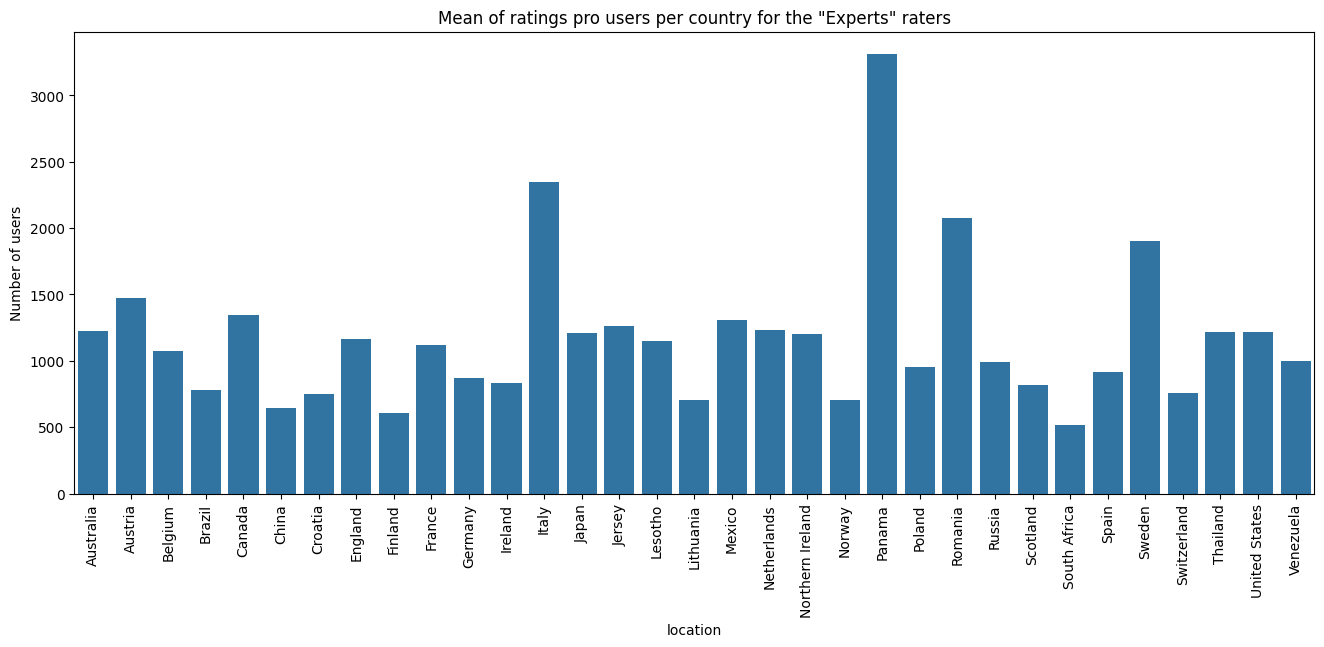

In [101]:
plt.figure(figsize=(16,6))
sns.barplot(x=location_pro.index, y=location_pro['mean'])
plt.title('Mean of ratings pro users per country for the "Experts" raters')
#plt.hist(location_pro.index,location_pro['mean'])
#plt.scatter(location_pro.index,location_pro['max'],color = 'red', marker = 'o')
plt.xticks(rotation = 'vertical')
plt.ylabel('Number of users')
plt.show()

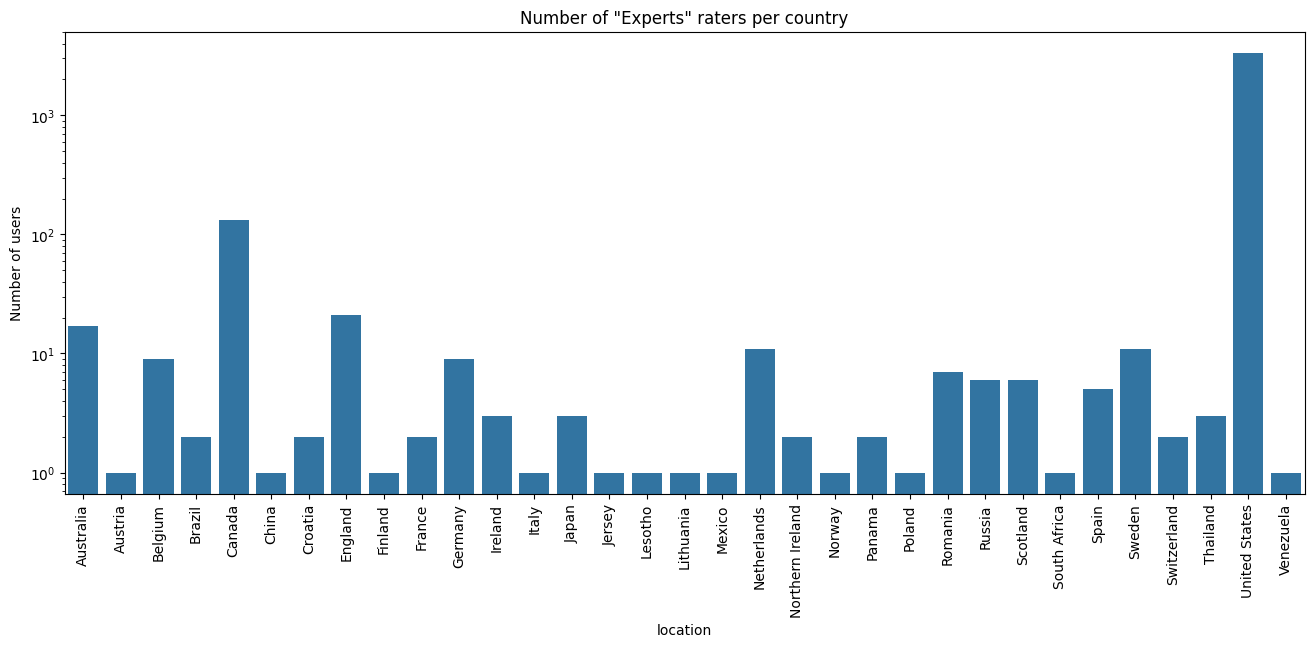

In [102]:

plt.figure(figsize=(16,6))
sns.barplot(x = location_pro.index,y = location_pro['count'])
plt.title('Number of "Experts" raters per country')
#plt.hist(location_pro.index,location_pro['mean'])
#plt.scatter(location_pro.index,location_pro['max'],color = 'red', marker = 'o')
plt.yscale('log')
plt.xticks(rotation = 'vertical')
plt.ylabel('Number of users')
plt.show()


## Pro Raters for the countries which have minimum 8 differents raters 

In [77]:
loc_pro_min = location_pro.query('count >= 8')
loc_pro_min



,mean,count,max,min
location,,,,
Australia,1222.529412,17,2857,527
Belgium,1074.555556,9,2238,514
Canada,1346.145038,131,12046,501
England,1161.095238,21,3050,531
Germany,868.777778,9,1049,510
Netherlands,1230.272727,11,2862,530
Sweden,1903.545455,11,5437,532
United States,1214.279416,3357,10360,501


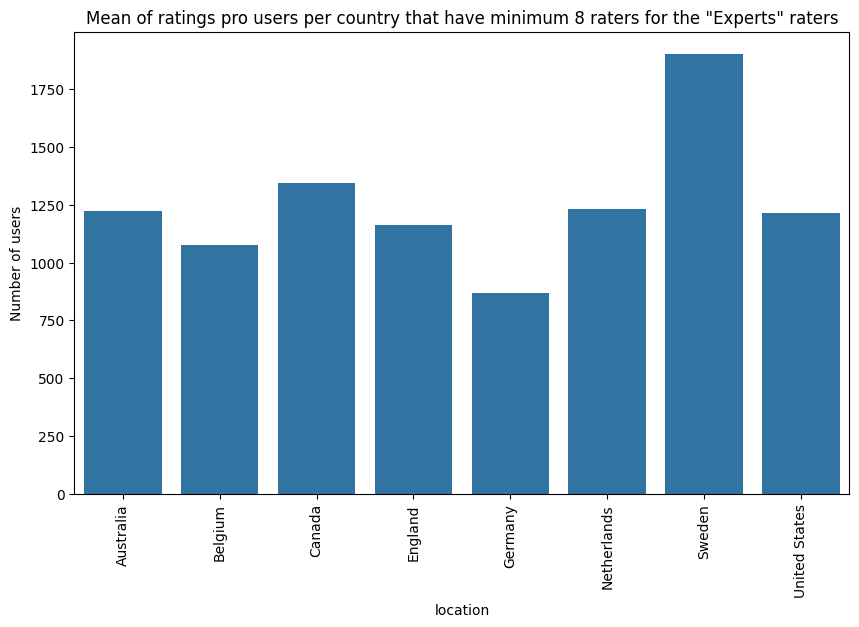

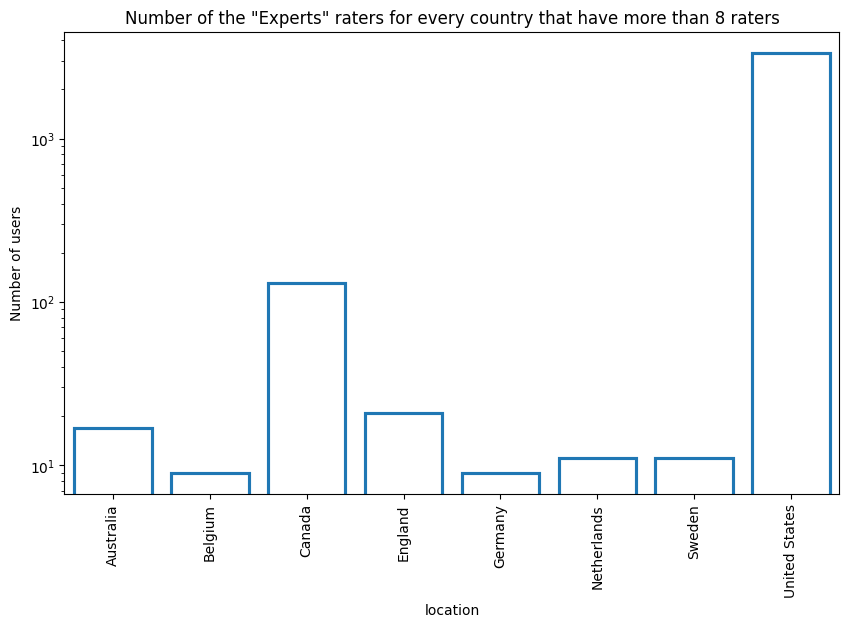

In [78]:
plt.figure(figsize=(10,6))
sns.barplot(x=loc_pro_min.index, y=loc_pro_min['mean'])
plt.title('Mean of ratings pro users per country that have minimum 8 raters for the "Experts" raters')
#plt.hist(location_pro.index,location_pro['mean'])
#plt.scatter(location_pro.index,location_pro['max'],color = 'red', marker = 'o')
plt.xticks(rotation = 'vertical')
plt.ylabel('Number of users')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=loc_pro_min.index, y=loc_pro_min['count'], fill = False)
plt.title('Number of the "Experts" raters for every country that have more than 8 raters')
#plt.hist(location_pro.index,location_pro['mean'])
#plt.scatter(location_pro.index,location_pro['max'],color = 'red', marker = 'o')
plt.xticks(rotation = 'vertical')
plt.yscale('log')
plt.ylabel('Number of users')
plt.show()

## For the Novices

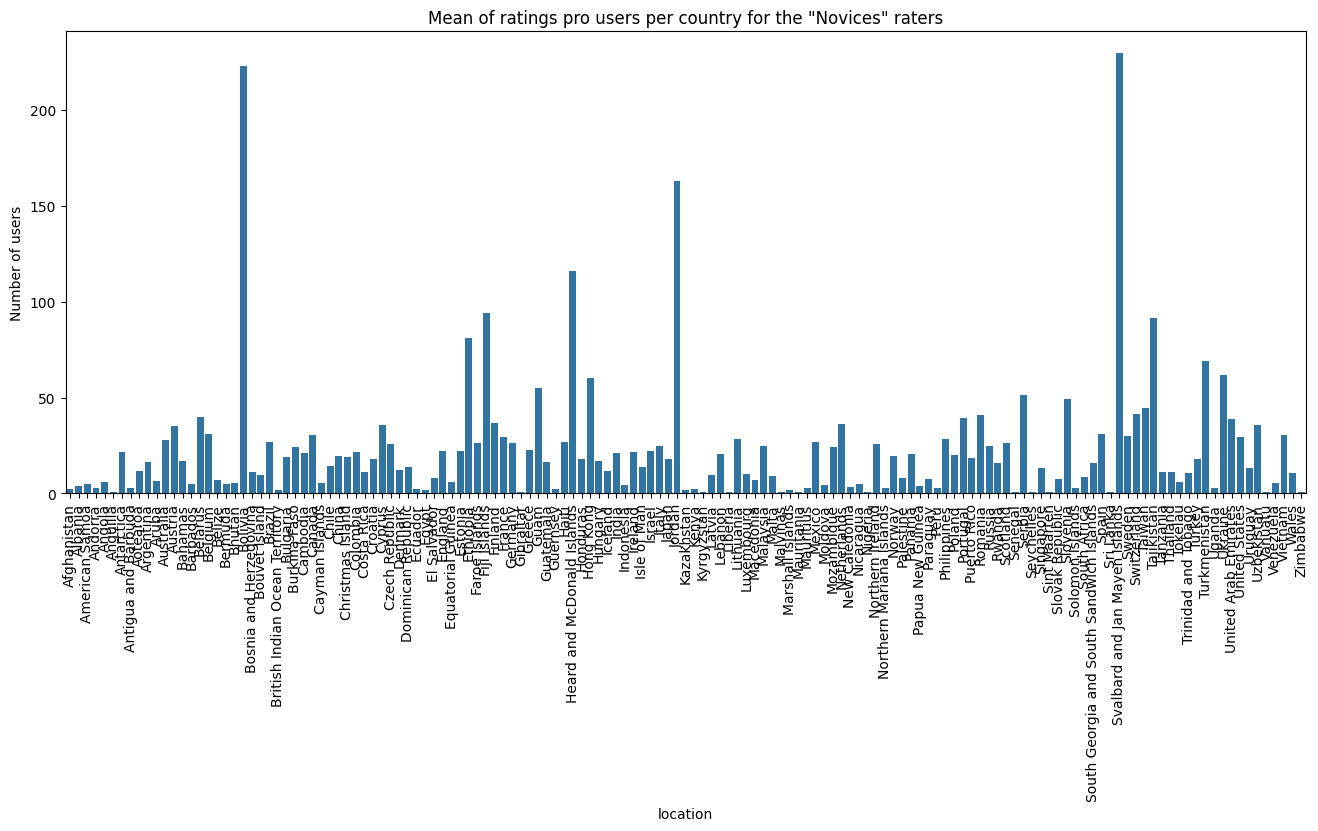

In [61]:
plt.figure(figsize=(16,6))
sns.barplot(x = location_novices.index, y = location_novices['mean'])
plt.title('Mean of ratings pro users per country for the "Novices" raters')
plt.xticks(rotation = 'vertical')
plt.ylabel('Number of users')
plt.show()




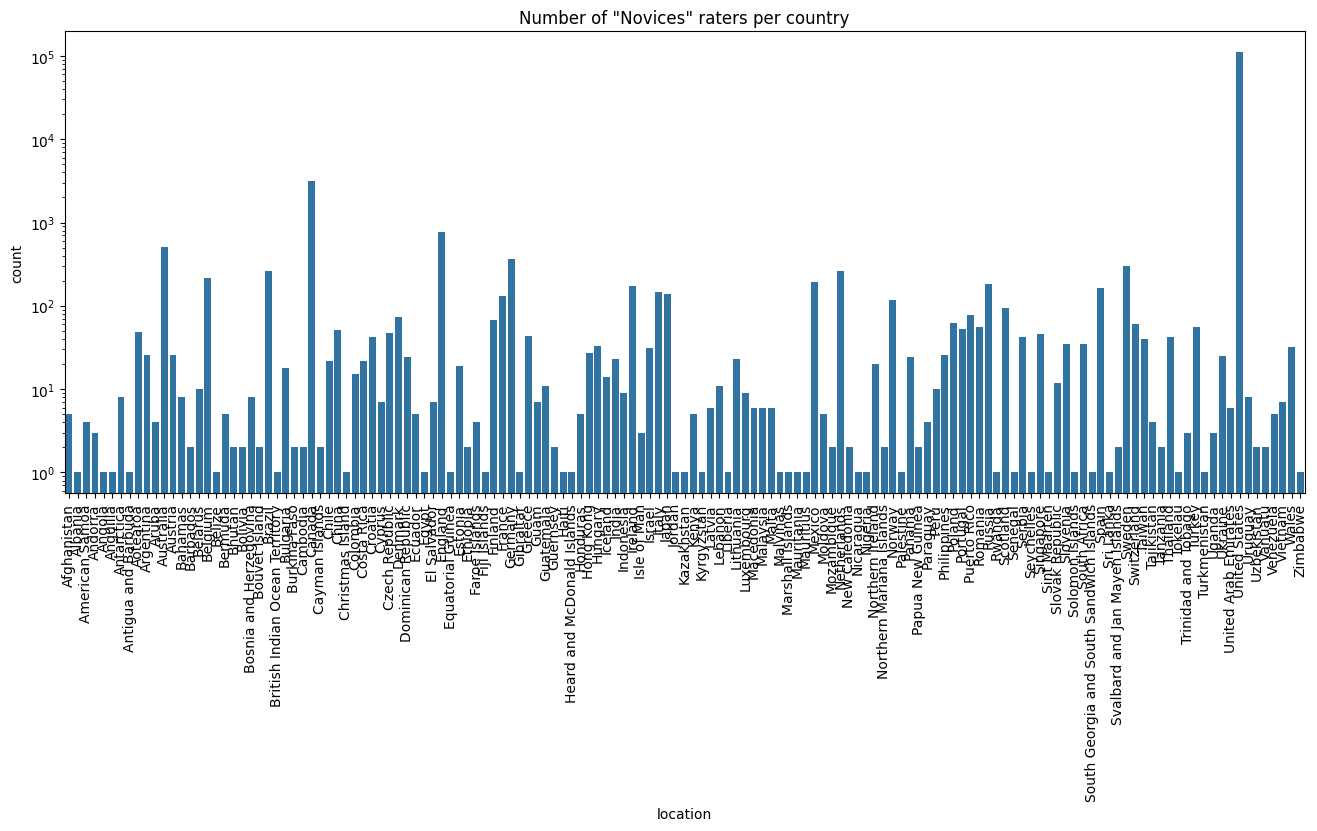

In [65]:
plt.figure(figsize=(16,6))
sns.barplot(x = location_novices.index,y = location_novices['count'])
plt.yscale('log')
plt.xticks(rotation = 'vertical')
plt.title('Number of "Novices" raters per country')
plt.show()



## USERS RB (RATED BEER)

In [103]:
users_RB_original

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany
...,...,...,...,...,...
70169,1,134893,stamfordbus,1.315217e+09,England
70170,1,327816,fobia405,1.406282e+09,Belgium
70171,1,183139,junkin,1.339841e+09,NaN
70172,3,82020,klesidra,1.222250e+09,Slovenia


In [107]:
#takingRB
users_RB = users_RB_original.copy()
users_RB['location'] =  users_RB['location'].str.replace(r'^United States.*', 'United States', regex=True)
users_RB.nbr_ratings.mean()
country_RB = users_RB.groupby(['location'])['nbr_ratings'].agg(['mean','count','max','min'])
country_RB
#genre = country.index.unique()
#genre

,mean,count,max,min
location,,,,
Abkhazia,2.000000,3,3,1
Afghanistan,3.750000,8,16,1
Albania,1.750000,4,3,1
Algeria,19.500000,2,38,1
American Samoa,2.000000,1,2,2
...,...,...,...,...
Virgin Islands (U.S.),2.800000,15,15,1
Wales,10.857143,133,451,1
Yemen,2.000000,1,2,2


In [106]:
users_RB

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany
...,...,...,...,...,...
70169,1,134893,stamfordbus,1.315217e+09,England
70170,1,327816,fobia405,1.406282e+09,Belgium
70171,1,183139,junkin,1.339841e+09,NaN
70172,3,82020,klesidra,1.222250e+09,Slovenia


In [110]:
user_pro_RB = users_RB.query('nbr_ratings > 500')
user_novice_RB = users_RB.query('nbr_ratings <= 500')
user_pro_RB
#user_novice_RB

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany
5,21024,227834,Beerhunter111,1.352718e+09,Germany
6,8781,83106,Erzengel,1.224324e+09,Germany
...,...,...,...,...,...
18287,506,418037,DijkBier,1.466762e+09,Netherlands
18358,639,323289,MMJL,1.403518e+09,Poland
20330,545,364823,KrzysztofZ,1.428314e+09,Poland
20796,880,144632,TylerGreenDC,1.323256e+09,NaN


In [115]:
location_pro_RB = user_pro_RB.groupby(['location'])['nbr_ratings'].agg(['mean','count','max','min'])
location_novices_RB = user_novice_RB.groupby(['location'])['nbr_ratings'].agg(['mean','count','max','min'])
location_novices_RB
print(location_novices_RB['mean'].max())

#Max Mean for a country 
print(location_pro_RB['mean'].max())
pays_max_RB = location_pro_RB.query('mean == 10118')


pays_min_RB = location_novices_RB.query('mean == 374')
#pays_min_RB
pays_max_RB

374.0
10118.0


,mean,count,max,min
location,,,,
Faroe Islands,10118.0,1,10118,10118


**Big Mean but only one guys...**

In [116]:
location_pro_RB

,mean,count,max,min
location,,,,
Australia,1425.392857,56,5696,504
Austria,2249.666667,6,4514,541
Belarus,3354.500000,2,4300,2409
Belgium,2504.382979,47,9590,507
Bermuda,1604.000000,1,1604,1604
...,...,...,...,...
Thailand,6112.000000,2,10310,1914
Turkey,3028.000000,1,3028,3028
Ukraine,821.500000,2,1087,556


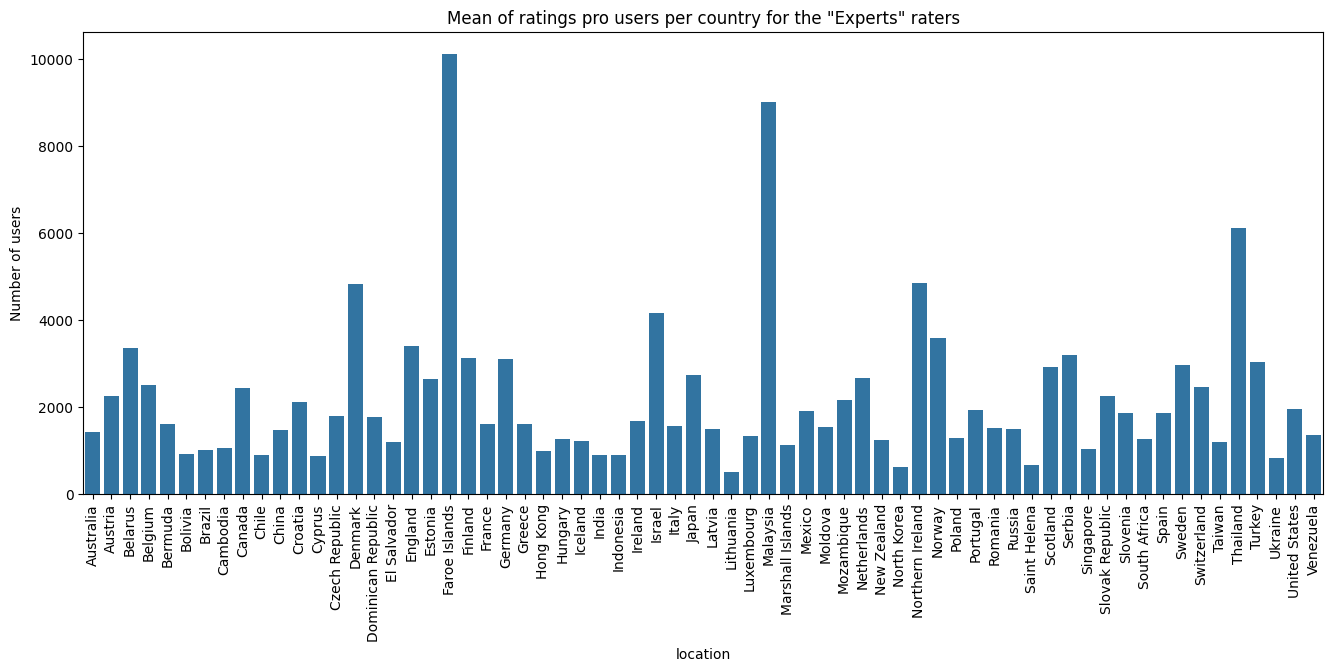

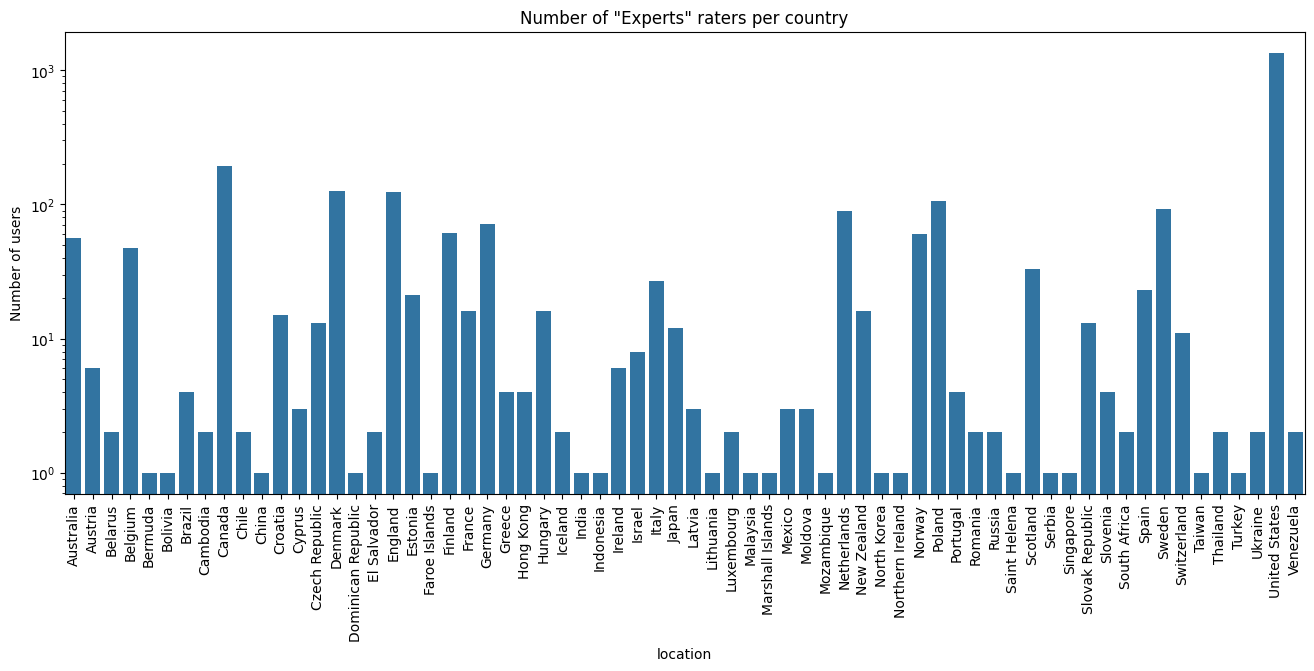

In [117]:
plt.figure(figsize=(16,6))
sns.barplot(x=location_pro_RB.index, y=location_pro_RB['mean'])
plt.title('Mean of ratings pro users per country for the "Experts" raters')
#plt.hist(location_pro.index,location_pro['mean'])
#plt.scatter(location_pro.index,location_pro['max'],color = 'red', marker = 'o')
plt.xticks(rotation = 'vertical')
plt.ylabel('Number of users')
plt.show()
plt.figure(figsize=(16,6))
sns.barplot(x = location_pro_RB.index,y = location_pro_RB['count'])
plt.title('Number of "Experts" raters per country')
#plt.hist(location_pro.index,location_pro['mean'])
#plt.scatter(location_pro.index,location_pro['max'],color = 'red', marker = 'o')
plt.yscale('log')
plt.xticks(rotation = 'vertical')
plt.ylabel('Number of users')
plt.show()


# Filtre à plus de 10 raters pour plot 

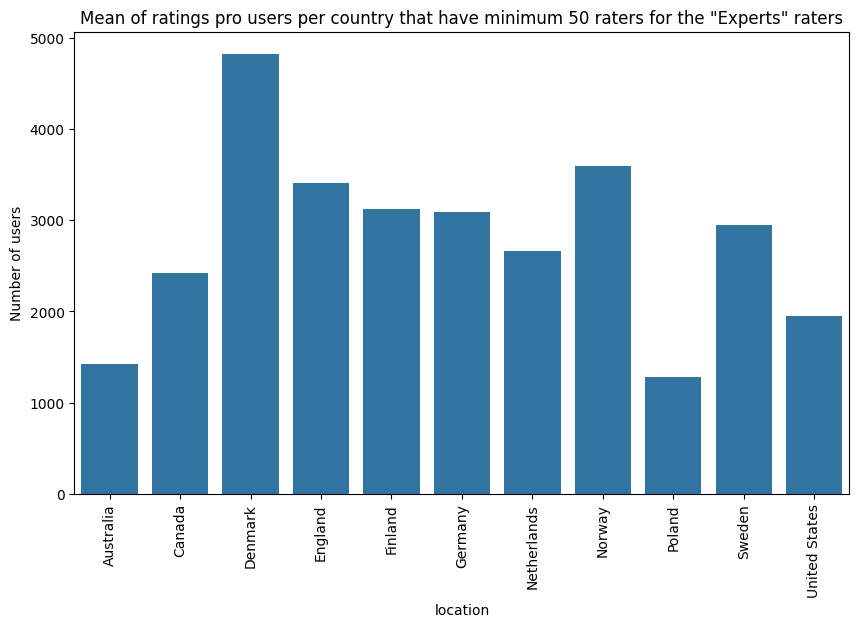

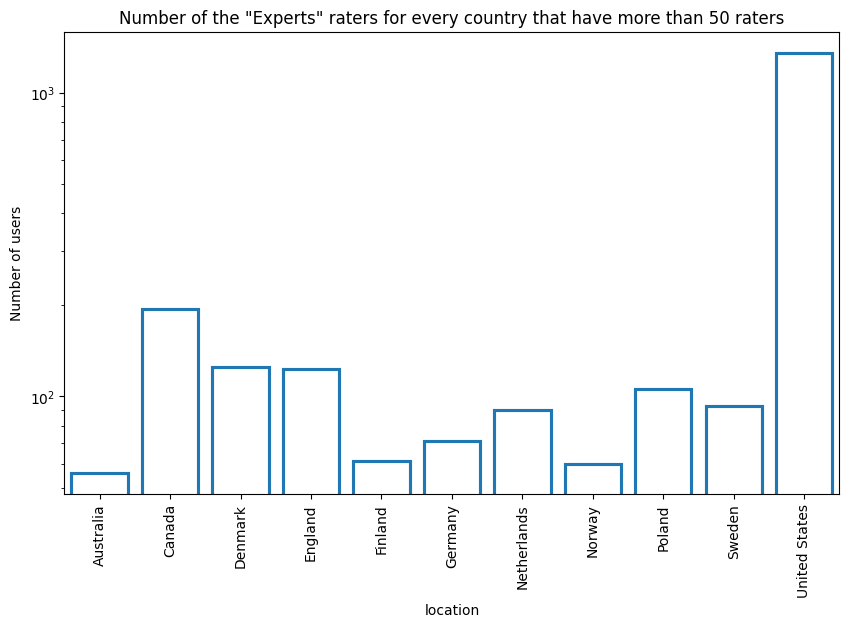

In [122]:
loc_pro_RB = location_pro_RB.query('count >= 50')

plt.figure(figsize=(10,6))
sns.barplot(x=loc_pro_RB.index, y=loc_pro_RB['mean'])
plt.title('Mean of ratings pro users per country that have minimum 50 raters for the "Experts" raters')

plt.xticks(rotation = 'vertical')
plt.ylabel('Number of users')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=loc_pro_RB.index, y=loc_pro_RB['count'], fill = False)
plt.title('Number of the "Experts" raters for every country that have more than 50 raters')
#plt.hist(location_pro.index,location_pro['mean'])
#plt.scatter(location_pro.index,location_pro['max'],color = 'red', marker = 'o')
plt.xticks(rotation = 'vertical')
plt.yscale('log')
plt.ylabel('Number of users')
plt.show()

In [121]:
loc_pro_RB

,mean,count,max,min
location,,,,
Australia,1425.392857,56,5696,504
Canada,2425.829897,194,18662,506
Denmark,4828.144000,125,46749,513
England,3408.162602,123,22640,504
Finland,3124.311475,61,24966,513
Germany,3091.098592,71,21024,510
Netherlands,2662.866667,90,15563,501
Norway,3590.983333,60,15986,524
Poland,1279.396226,106,7104,507


## And if we do directly with the rathers expert and not and then we divide the countries 

In [123]:
users_RB

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany
...,...,...,...,...,...
70169,1,134893,stamfordbus,1.315217e+09,England
70170,1,327816,fobia405,1.406282e+09,Belgium
70171,1,183139,junkin,1.339841e+09,NaN
70172,3,82020,klesidra,1.222250e+09,Slovenia


In [134]:
location_RB = users_RB.groupby(['location'])['nbr_ratings'].agg(['mean','count','max','min'])


location_RB
novice_RB = location_RB.query('mean < 500 and count < 50')
expert_RB = location_RB.query('mean >= 200 and count > 50')
expert_RB
#novice_RB

,mean,count,max,min
location,,,,
Croatia,227.825806,155,8038,1
Denmark,614.756547,1031,46749,1
Estonia,432.865672,134,15609,1
Finland,454.736726,452,24966,1
Germany,267.911336,891,21024,1
Israel,443.346154,78,13813,1
Japan,294.059322,118,8694,1
Netherlands,240.247489,1095,15563,1
Norway,344.755952,672,15986,1


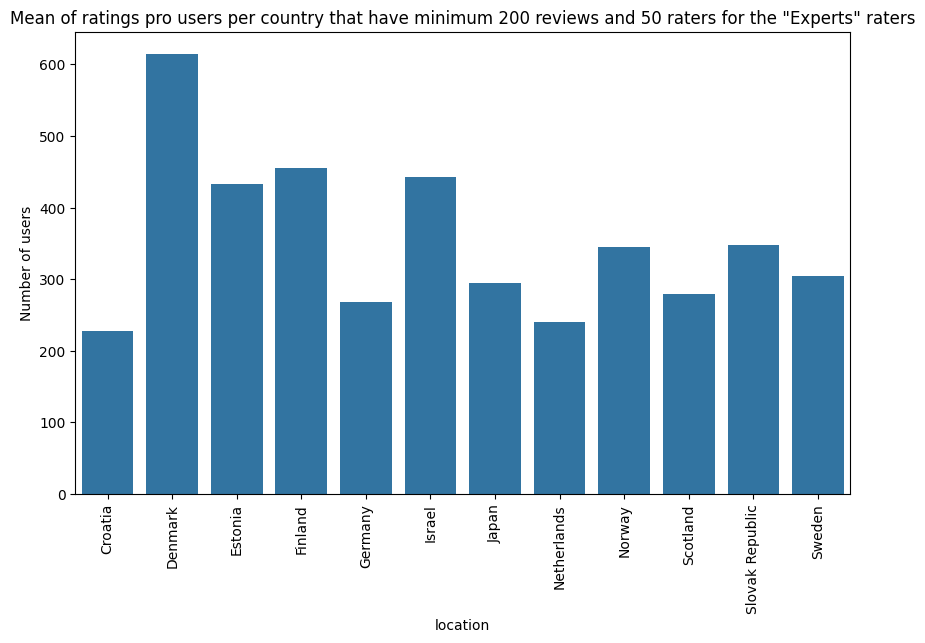

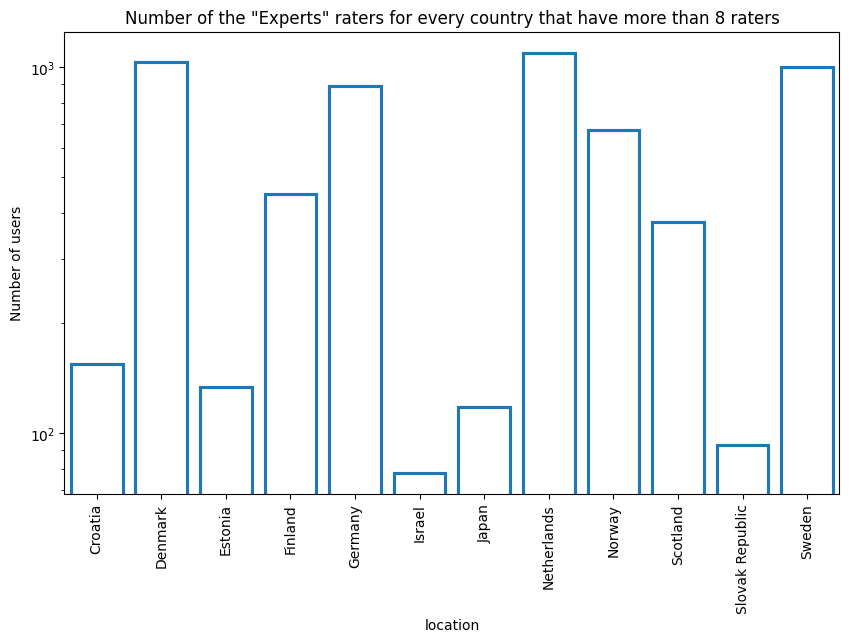

In [138]:
plt.figure(figsize=(10,6))
sns.barplot(x=expert_RB.index, y=expert_RB['mean'])
plt.title('Mean of ratings pro users per country that have minimum 200 reviews and 50 raters for the "Experts" raters')
#plt.hist(location_pro.index,location_pro['mean'])
#plt.scatter(location_pro.index,location_pro['max'],color = 'red', marker = 'o')
plt.xticks(rotation = 'vertical')
plt.ylabel('Number of users')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=expert_RB.index, y=expert_RB['count'], fill = False)
plt.title('Number of the "Experts" raters for every country that have more than 8 raters')
#plt.hist(location_pro.index,location_pro['mean'])
#plt.scatter(location_pro.index,location_pro['max'],color = 'red', marker = 'o')
plt.xticks(rotation = 'vertical')
plt.yscale('log')
plt.ylabel('Number of users')
plt.show()